In [95]:
#Importando pacotes que serão utilizados para a resolução do exercício
import numpy as np
import networkx as ntx
import matplotlib.pyplot as plt
import random
from networkx.algorithms import tree
from itertools import combinations, product
from math import comb

A soma dos graus de todos os vértices de um grafo G é duas vezes o número de arestas
Dado o grafo $G(V,E)$
$$
\sum_{v \in V}{G(v)} = 2 . |E|
$$

Se queremos que $ |E| = 2|N| $, então, um grafo com todos os vértices de mesmo grau $degree(G)$:

$$
|N|degree(G) = 2 . 2|N|

\implies degree(G) = 4
$$

Para facilitar o processo de criação de grafos aleatórios, irá ser considerado que cada vértice possui um grau maior que $4$

In [23]:
#função gera um grafo completo com arestas de caminhos aleatórios
def get_distance(x1,x2,y1,y2):
    dist = ((x1 - x2)**2 + (y1- y2)**2)**(1/2)
    return dist

def generate_random_graph(n, max_degree, seed=10):
    if(max_degree > n):
        raise Exception("O grau máximo deve ser menor que o número de vértices")

    random.seed(seed)
    expected_degree = random.randint(4,max_degree)
    
    G = ntx.expected_degree_graph(list(np.ones(n)*expected_degree), seed=None, selfloops=False)
    #Transforma em um grafo não ordenado
    ntx.to_undirected(G)

    #Atribui uma coordenada aleatória x e y
    for node in ntx.nodes(G):
        ntx.set_node_attributes(G,{node:{"pos":(random.uniform(0,5),random.uniform(0,5))}})
         
    #Atribui uma distância a cada ponto
    for edge in ntx.edges(G):
        ntx.set_edge_attributes(G,{edge:{"distance":get_distance(G.nodes[edge[0]]['pos'][0], G.nodes[edge[1]]['pos'][0], G.nodes[edge[0]]['pos'][1], G.nodes[edge[1]]['pos'][1]),"cmap":0.25}})
        
    return G

In [37]:
#Função desenha um grafo
def draw_graph(G,modified = False, path_list = [], layout='circular', show_arrows = True, has_path = True,custom_edges=[]):
    f,ax = plt.subplots(figsize=(6,6))

    pos = ntx.get_node_attributes(G,'pos')

    #Determina as posições de cada vértice
    x = []
    y = []

    for i in range(len(pos)):
        x.append(pos[i][0])
        y.append(pos[i][1])

    # #Desenha as arestas de acordo com o problema
    if not modified:
        ntx.draw_networkx_edges(G, pos=pos, edge_color='dimgray',alpha=0.5)

    #Plota cada vértice
    plt.scatter(x,y,edgecolor={'black'})

    #Adiciona o nome em cima de cada vértice
    eps=0.03
    for i, txt in enumerate(range(len(pos))):
        plt.annotate(txt, (x[i]+eps, y[i]+eps))
        
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.grid(True)
    plt.show()

In [101]:
def get_random_list_of_edges(n):
    if comb(n,2) < n*3:
        return list(combinations(range(n), r = 2))
    else:
        return random.sample(list(combinations(range(n), r = 2)),3*n)

In [75]:
combinations(list(product(range(5),repeat = 2)), r = 2)

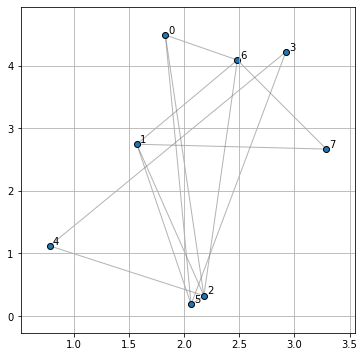

In [63]:
n = 8
n_max_arestas = 4

G = generate_random_graph(n, n_max_arestas, seed=10)
draw_graph(G)
g_random_edges = get_random_list_of_edges(n)

min_distance = []
for edge in g_random_edges:
    min_distance.append({"edge":edge,"min_dist":ntx.dijkstra_path_length(G,edge[0],edge[1],weight='distance')})
    

In [53]:
#Aplicando o método de dijkstra

random_edge_list= get_random_list_of_edges(n)

min_distance = []
for edge in random_edge_list:
    res = ntx.dijkstra_path_length(G,edge[0], edge[1],weight='distance')
    min_distance.append(res)
    if G.has_edge(edge[0], edge[1]):
        G[edge[0]][edge[1]].update({"distance":res})
    else:
        G.add_edge(edge[0], edge[1], distance = res)

In [50]:
#Criando uma lista de arestas (par de vértices)


In [102]:

len(random_edge_list)

24

In [98]:
random_edge_list

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [34]:
print(ntx.get_edge_attributes(G,"distance"))

{(0, 2): 4.180638856038543, (0, 5): 4.3126893321717334, (0, 6): 0.7657259501090172, (1, 2): 2.4952318921058545, (1, 5): 2.6072313149300217, (1, 6): 1.62459742713585, (1, 7): 1.7193828366613546, (2, 4): 1.6090440439779887, (2, 5): 0.18195509993198844, (2, 6): 3.7771053646748536, (3, 4): 3.7663195449678395, (3, 5): 4.125992376916031, (6, 7): 1.635186477305665}


In [ ]:
#Função desenha um grafo
def draw_graph(G,modified = False, path_list = [], layout='circular', show_arrows = True, has_path = True,custom_edges=[]):
    f,ax = plt.subplots(figsize=(6,6))

    #Define um layout adequado
    if layout == 'circular':
        pos = ntx.circular_layout(G)
    else:
        pos = ntx.random_layout(G, seed=3)

    #Determina as posições de cada vértice
    x = []
    y = []
    
    for i in range(len(pos)):
        x.append(pos[i][0])
        y.append(pos[i][1])

    #Desenha as arestas de acordo com o problema
    if not modified:
        ntx.draw_networkx_edges(G, pos=pos, edge_color='dimgray',alpha=0.5)
    else:
        if has_path:
            custom_edges = []
            for i in range(len(path_list)-1):
                custom_edges.append((path_list[i],path_list[i+1]))
        edge_labels = ntx.get_edge_attributes(ntx.to_directed(G.subgraph(path_list)), "weight")
        del edge_labels[(path_list[0],path_list[-1])]
        del edge_labels[(path_list[-1],path_list[0])]
        if has_path:
            #Desenha um subgrafo direcionado dado um trajeto
            ntx.draw_networkx_edges(ntx.to_directed(G.subgraph(path_list)), pos=pos
    , edgelist = custom_edges, edge_color='r', label='weight', arrows = show_arrows)
            ntx.draw_networkx_edge_labels(ntx.to_directed(G.subgraph(path_list)), pos, edge_labels, rotate =False)
        else:
            ntx.draw_networkx_edges(G.subgraph(path_list), pos=pos
    , edgelist = custom_edges, edge_color='r', label='weight', arrows = show_arrows)

    #Plota cada vértice
    plt.scatter(x,y,edgecolor={'black'})

    #Adiciona o nome em cima de cada vértice
    eps=0.03
    for i, txt in enumerate(range(len(pos))):
        plt.annotate(txt, (x[i]+eps, y[i]+eps))
    plt.show()

In [ ]:
G = generate_random_graph(15)
draw_graph(G)

In [ ]:
v_ini = 0
v_final = 3

#Aplicando o método de dijkstra
min_path = ntx.dijkstra_path(G, v_ini, v_final, weight='weight')
min_distance = ntx.dijkstra_path_length(G,0,5,weight='weight')

print(f'Vértice inicial: {v_ini}, Vértice final: {v_final}')
print(f'Menor caminho: {min_path} \nMenor distância: {min_distance}')
draw_graph(G,modified = True, path_list = min_path)

In [ ]:
def prim(G):
  E = tree.minimum_spanning_edges(G, algorithm="prim", data=False)
  edges = list(E)
  sorted_edges = sorted(sorted(x) for x in edges)
  return sorted_edges

In [ ]:
G = generate_random_graph(n=26, seed=10)
E = prim(G)
draw_graph(G,layout='')


In [ ]:
#Aplicando o prim
draw_graph(G,modified = True, path_list = list(G.nodes), layout=' ', show_arrows = False, has_path = False,custom_edges=E)